In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from astropy.table import Table

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [6]:
Gfile = 'kepler_dr2_4arcsec.fits' # from http://gaia-kepler.fun, thanks to M. Bedell
data = Table.read(Gfile, format='fits')

In [18]:
gaia = data.to_pandas()
gaia.shape

(241989, 61)

In [17]:
rot_file = 'Table_Periodic.txt'
rot = pd.read_csv(rot_file)
rot.shape

(34030, 11)

In [23]:
df = pd.merge(rot, gaia, right_on='kepid', left_on='KID')
df.shape

(42301, 72)

In [24]:
df.columns

Index([u'KID', u'Teff', u'logg_x', u'Mass', u'Prot', u'Prot_err', u'Rper',
       u'LPH', u'w', u'DC', u'Flag', u'angDist', u'kepid', u'source_id',
       u'ra_gaia', u'ra_error', u'dec_gaia', u'dec_error', u'parallax',
       u'parallax_error', u'pmra', u'pmra_error', u'pmdec', u'pmdec_error',
       u'phot_g_mean_flux', u'phot_g_mean_flux_error', u'phot_g_mean_mag',
       u'phot_bp_mean_flux', u'phot_bp_mean_flux_error', u'phot_bp_mean_mag',
       u'phot_rp_mean_flux', u'phot_rp_mean_flux_error', u'phot_rp_mean_mag',
       u'bp_rp', u'radial_velocity', u'radial_velocity_error', u'teff_val',
       u'a_g_val', u'e_bp_min_rp_val', u'radius_val', u'lum_val',
       u'tm_designation', u'ra_kic', u'dec_kic', u'kepmag', u'teff',
       u'teff_err1', u'teff_err2', u'teff_prov', u'logg_y', u'logg_err1',
       u'logg_err2', u'logg_prov', u'feh', u'feh_err1', u'feh_err2',
       u'feh_prov', u'radius', u'radius_err1', u'radius_err2', u'mass',
       u'mass_err1', u'mass_err2', u'prov_sec',

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10


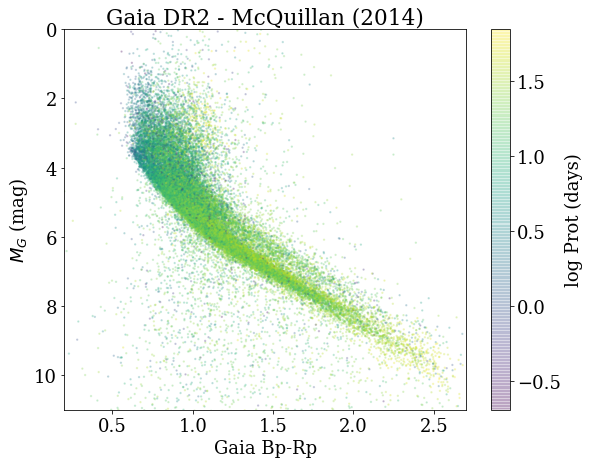

In [40]:
plt.figure(figsize=(9,7))
cm = plt.cm.get_cmap('Spectral')

plt.scatter(df[u'bp_rp'], df[u'phot_g_mean_mag'] + 5. * np.log10(df[u'parallax']/1000.)  + 5, 
            c=np.log10(df[u'Prot'].values),
            alpha=0.2, s=2)

plt.ylim(11,0)
plt.xlim(.2,2.7)
plt.xlabel('Gaia Bp-Rp')
plt.ylabel('$M_G$ (mag)')
plt.title('Gaia DR2 - McQuillan (2014)')
# plt.text(4000, 1, 'N=894', fontsize=12)

cb = plt.colorbar()
cb.set_label('log Prot (days)')